In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from scipy.stats import entropy

frames = []

for root, dirs, files in os.walk('../data/'):
    for f in files:
        if f.endswith(".csv"):
            file_path = os.path.join(root, f)
            dataframe = pd.read_csv(file_path)
            dataframe.columns=dataframe.columns.str.replace('\t','')
            frames.append(dataframe)

data = pd.concat(frames, sort=False)[['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Utility_Increase']]

# Data Transformation

In [2]:
# Cube Root Transformationn
data_cube = data.apply(lambda x: np.power(x, (1/3)) if x.name == 'Optimal_Utility_Increase' else x)
# Square Root Transformation
data_sqt = data.apply(lambda x: np.sqrt(x) if x.name == 'Optimal_Utility_Increase' else x)
# Log10 Transformation
np.seterr(divide = 'ignore')
data_log10 = data.apply(lambda x: np.log10(x) if x.name == 'Optimal_Utility_Increase' else x).replace([np.inf, -np.inf], 0)


/Users/rachel/Library/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rachel/Library/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


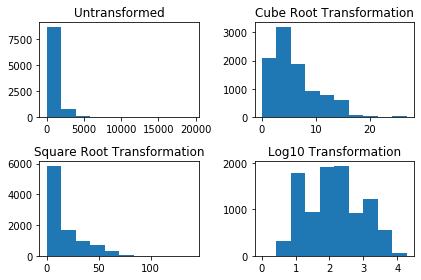

In [3]:
# analyzing historgams
fig = plt.figure()
ax1 = fig.add_subplot(221)
plt.hist(data['Optimal_Utility_Increase'])
ax1.title.set_text('Untransformed')
ax2 = fig.add_subplot(222)
plt.hist(data_cube['Optimal_Utility_Increase'])
ax2.title.set_text('Cube Root Transformation')
ax3 = fig.add_subplot(223)
plt.hist(data_sqt['Optimal_Utility_Increase'])
ax3.title.set_text('Square Root Transformation')
ax4 = fig.add_subplot(224)
plt.hist(data_log10['Optimal_Utility_Increase'])
ax4.title.set_text('Log10 Transformation')
plt.tight_layout()
plt.show()

# Comparison of the results

## Skewness

([<matplotlib.axis.XTick at 0x1a23133150>,
 <a list of 4 Text xticklabel objects>)

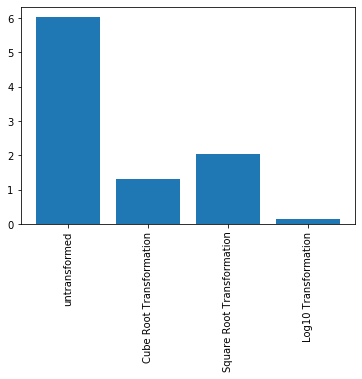

In [10]:
un_skew = data['Optimal_Utility_Increase'].skew()
cub_skew = data_cube['Optimal_Utility_Increase'].skew()
sqt_skw = data_sqt['Optimal_Utility_Increase'].skew()
log_skw = data_log10['Optimal_Utility_Increase'].skew()

labels = ['untransformed', 'Cube Root Transformation', 'Square Root Transformation', 'Log10 Transformation']
xticks = range(len(labels))

plt.bar(xticks, [un_skew, cub_skew, sqt_skw, log_skw])
plt.xticks(xticks, labels, rotation='vertical')

## Kurtosis

([<matplotlib.axis.XTick at 0x1a27958990>,
 <a list of 4 Text xticklabel objects>)

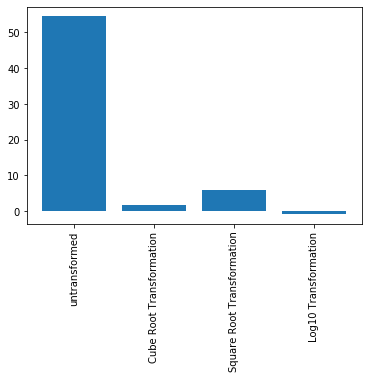

In [25]:
un_krt = data['Optimal_Utility_Increase'].kurtosis()
cub_krt = data_cube['Optimal_Utility_Increase'].kurtosis()
sqt_krt = data_sqt['Optimal_Utility_Increase'].kurtosis()
log_krt = data_log10['Optimal_Utility_Increase'].kurtosis()

labels = ['untransformed', 'Cube Root Transformation', 'Square Root Transformation', 'Log10 Transformation']
xticks = range(len(labels))

plt.bar(xticks, [un_krt, cub_krt, sqt_krt, log_krt])
plt.xticks(xticks, labels, rotation='vertical')

# Results

In [ ]:
# further analyzing ideas: Kullback divergence / distance
#bins = np.arange(0,3.5,0.1)
#hist_untransformed = np.histogram(result_skw['untransformed'].values.tolist(), bins=bins)[0]
#hist_cube = np.histogram(result_skw['cube'].values.tolist(), bins=bins)[0]
#entropy(hist_untransformed, qk=hist_cube)